In [1]:
import sys
sys.path.insert(0, '..\\..\\..\\frxas.py')

from frxas import visualization

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import palettable


from impedance.models.circuits import CustomCircuit

In [2]:
def plot_nyquist(ax, Z, scale=1, units='Ohms', fmt='.-', **kwargs):
    """ Plots impedance as a Nyquist plot using matplotlib

        Parameters
        ----------
        ax: matplotlib.axes.Axes
            axes on which to plot the nyquist plot
        Z: np.array of complex numbers
            impedance data
        scale: float
            the scale for the axes
        units: string
            units for :math:`Z(\\omega)`
        fmt: string
            format string passed to matplotlib (e.g. '.-' or 'o')

        Other Parameters
        ----------------
        **kwargs : `matplotlib.pyplot.Line2D` properties, optional
            Used to specify line properties like linewidth, line color,
            marker color, and line labels.

        Returns
        -------
        ax: matplotlib.axes.Axes
    """

    ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)

    # Make the axes square
    ax.set_aspect('equal')

    # Set the labels to -imaginary vs real
    ax.set_xlabel(r'$Z^{\prime}(\sigma)$ ' +
                  '$(\Omega)$'.format(units), fontsize=20)
    ax.set_ylabel(r'$-Z^{\prime\prime}(\sigma)$ ' +
                  '$(\Omega)$'.format(units), fontsize=20)

    # Make the tick labels larger
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Change the number of labels on each axis to five
    ax.locator_params(axis='x', nbins=5, tight=True)
    ax.locator_params(axis='y', nbins=5, tight=True)

    # Add a light grid
    ax.grid(b=True, which='major', axis='both', alpha=.5)

    # Change axis units to 10**log10(scale) and resize the offset text
    limits = -np.log10(scale)
    if limits != 0:
        ax.ticklabel_format(style='sci', axis='both',
                            scilimits=(limits, limits))
    y_offset = ax.yaxis.get_offset_text()
    y_offset.set_size(18)
    t = ax.xaxis.get_offset_text()
    t.set_size(18)

    return ax

In [3]:
for i in range(0, 8):
    print(1 - .1/(i+1), .1/(i+1))

0.9 0.1
0.95 0.05
0.9666666666666667 0.03333333333333333
0.975 0.025
0.98 0.02
0.9833333333333333 0.016666666666666666
0.9857142857142858 0.014285714285714287
0.9875 0.0125


In [4]:
sigs = [0, 0.1, 0.3, 1, 3., 10, 30, 1e6]

colors = palettable.colorbrewer.sequential.GnBu_9.mpl_colors[1:]
markers = ['P','o','d','v','^','s','>','<']

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 8}

mpl.rc('font', **font)

for i, (color, sig) in enumerate(zip(colors, sigs)):
#     sub = ((i-7)/30, (i-7)/15, (i-7)/9)
    sub = (-0.15/(i+1), -0.15/(i+1), -0.15/(i+1))
#     sub = (-.03, -.03, -.03 )
#     for j in color:
#     print(color, tuple(map(lambda i, j: i +j, color, sub)))
#     colors[i] = tuple(map(lambda i, j: i +j, color, sub))
    print(color, tuple([i+j if i+j >=0 else 0 for (i, j) in zip(color, sub)]))
    colors[i] = tuple([i+j if i+j >=0 else 0 for (i, j) in zip(color, sub)])

(0.8784313725490196, 0.9529411764705882, 0.8588235294117647) (0.7284313725490196, 0.8029411764705882, 0.7088235294117646)
(0.8, 0.9215686274509803, 0.7725490196078432) (0.7250000000000001, 0.8465686274509804, 0.6975490196078432)
(0.6588235294117647, 0.8666666666666667, 0.7098039215686275) (0.6088235294117647, 0.8166666666666667, 0.6598039215686274)
(0.4823529411764706, 0.8, 0.7686274509803922) (0.4448529411764706, 0.7625000000000001, 0.7311274509803922)
(0.3058823529411765, 0.7019607843137254, 0.8274509803921568) (0.27588235294117647, 0.6719607843137254, 0.7974509803921568)
(0.16862745098039217, 0.5490196078431373, 0.7450980392156863) (0.14362745098039217, 0.5240196078431373, 0.7200980392156863)
(0.03137254901960784, 0.40784313725490196, 0.6745098039215687) (0.009943977591036414, 0.38641456582633055, 0.6530812324929972)
(0.03137254901960784, 0.25098039215686274, 0.5058823529411764) (0.012622549019607843, 0.23223039215686275, 0.48713235294117646)


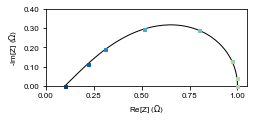

In [5]:
R_ohm = .1
R_chem = .9
tg = 1/(2 * np.pi)
w = 2 * np.pi * np.logspace(-2, 6, num=321)
w[0] = 0
inds = []
Z = R_ohm + R_chem / (np.sqrt(1 + 1j * w * tg))

_, ax = plt.subplots(figsize=(3.604,4))

plot_nyquist(ax, Z,fmt='-', c=(0,0,0), lw=1)

for i, sig in enumerate(sigs):
    ind = np.isclose(w*tg, sig,atol=1e-2,rtol=1e-2).nonzero()[0][0]
    inds.append(ind)
    plot_nyquist(ax, Z[ind], color=colors[i], marker='s', markersize=3, units=r'$\Omega$',zorder=10, clip_on=False)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylim(0, 0.4)
ax.set_xlim(0,1.05)
ax.set_xlabel('Re[Z] ($\Omega$)', **font)
ax.set_ylabel('-Im[Z] ($\Omega$)', **font)
ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
ax.grid(b=False)

# plt.savefig('Plots\\EIS\\Patterned_Z_6.svg', bbox_inches='tight', dpi=400)

In [23]:
def chi(y, Q, ld, tg, gammap, w_til):
    chi = -Q / (1 + gammap * np.sqrt(1 + 1j * w_til * tg)) *\
        np.exp(-y/ld*np.sqrt(1 + 1j * w_til * tg)) 
    return chi

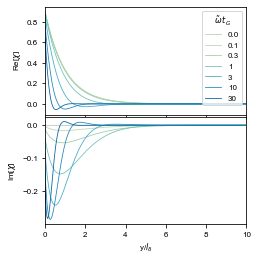

In [34]:
L = 0.65
Q = -1
ld = 2
gammap = R_ohm / R_chem 
# w_til = w[10]
y = np.linspace(0, 20, num=500)
# chi_sim = chi(y, Q, ld, tg, gammap, L, w_til)

fig, ax2 = plt.subplots(nrows=2, figsize=(3.604,4))
fig.subplots_adjust(hspace=0.02)
for i, sig in enumerate(sigs[:-1]):
    if int(sig):
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gammap, w[inds[i]]), marker=None,
                 color=colors[i], lw=.8, label=f'{w[inds[i]]*tg:.0f}')
    else:
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gammap, w[inds[i]]), marker=None,
                 color=colors[i], lw=.8,  label=f'{w[inds[i]]*tg:.1f}')
        
ax2[0].grid(False)
ax2[1].grid(False)
ax2[0].set_xlim(0, 10)
ax2[1].set_xlim(0, 10)
ax2[0].legend(loc='upper right', prop=font, title=r'$\tilde{\omega} \,t_{G}$') #sigma$')

ax2[0].tick_params(axis='both', which='major', labelsize=8)
ax2[1].tick_params(axis='both', which='major', labelsize=8)
ax2[0].set_ylabel('Re[$\chi$]', **font)
ax2[1].set_ylabel('Im[$\chi$]', **font)
ax2[1].set_xlabel('y/$l_{\delta}$', **font)
ax2[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f'))
# plt.show()p
# plt.savefig('Plots\\Profiles\\Predicted_Chi_6.svg', bbox_inches='tight', dpi=400)

# SCRATCH/OLD

In [33]:
dum_0 = chi(0, -.05, .5, 3.442, 0.03448, 0)
dum_25 = chi(0, -.05, .5, 3.442, 0.03448, 0.25 * 2 *np.pi)
np.abs(dum_25)/dum_0

(0.972795080410898+0j)

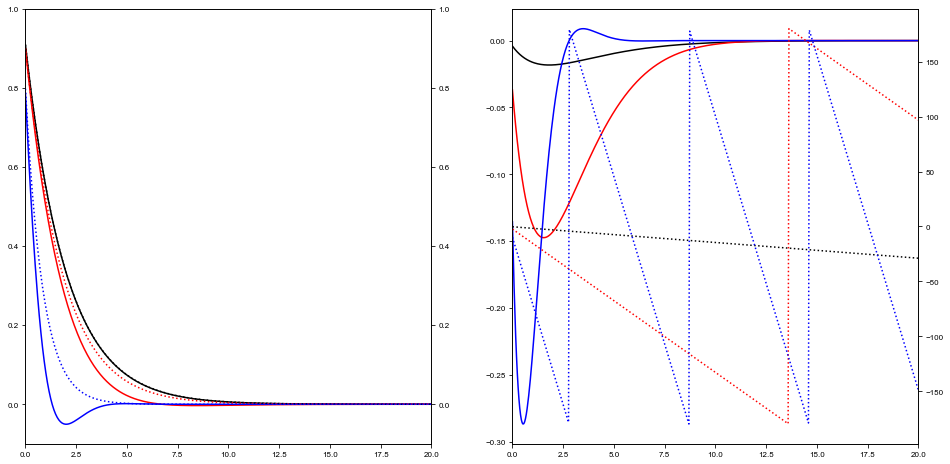

In [45]:
L = 0.65
Q = -1
ld = 2
R_ohm = 0.1
tg = 1/(2 * np.pi)
gamma = R_ohm * ld / L
w_til = 2 * np.pi * np.array([.1, 1, 10])  # np.array([0, .1, .3, 1, 3, 10, 30])

y = np.linspace(0, 20, num=500)
fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), ncols=2)

ax3 = ax1.twinx()
ax4 = ax2.twinx()

colors = [(0,0,0), (1,0,0), (0,0,1)]

for i, w in enumerate(w_til):
    chi_sim = chi(y, Q, ld, tg, gamma, L, w)

    ax1.plot(y, chi_sim.real, color=colors[i])
    ax3.plot(y, np.abs(chi_sim), color=colors[i], ls=':')
    
    ax2.plot(y, chi_sim.imag, color=colors[i])
    ax4.plot(y, np.angle(chi_sim, deg=True), color=colors[i], ls=':')

ax1.set_xlim(0, np.max(y))
ax2.set_xlim(0, np.max(y))

ax1.set_ylim(-1e-1, 1e-0)
ax3.set_ylim(-1e-1, 1e-0)

# ax2.set_ylim(0, np.max(y))
# ax4.set_ylim(0, np.max(y))


plt.show()

0.0
0.025
0.05
0.075


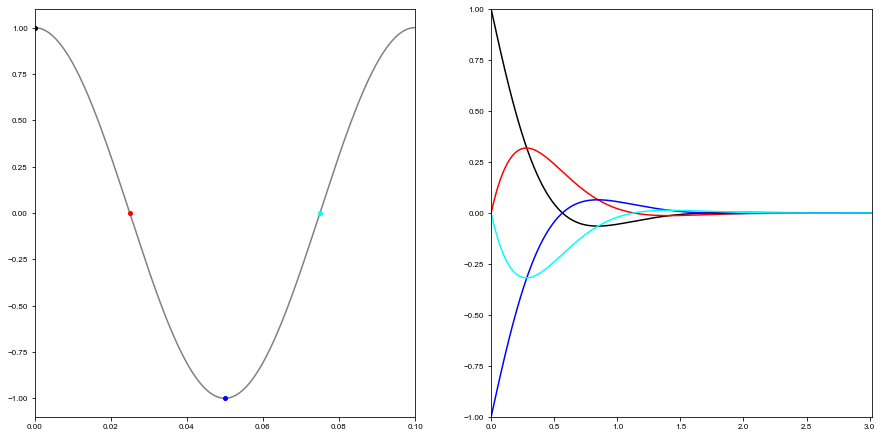

In [85]:
L = 0.65
Q = -1
ld = 2
R_ohm = 0.1
tg = 1
gamma = R_ohm * ld / L
f = 10
w_til = 2 * np.pi * f # np.array([0, .1, .3, 1, 3, 10, 30])
ts = np.array([0, 1/(4*f), 1/(2*f), 3/(4*f)])

fig, (ax1, ax2) = plt.subplots(figsize=(15, 7.5), ncols=2)
colors = [(0,0,0), (1,0,0), (0,0,1), (0,1,1)]

t = np.linspace(0, 1/f, num=201)
wfm = np.cos(w_til * t)
ax1.plot(t, wfm, color=(.5,.5,.5))
ax1.set_xlim(0, np.max(t))

y = np.linspace(0, 10/np.sqrt(1+f), num=500)
chi_bar = chi(y, Q, ld, tg, 0, L, w_til)

for i, t in enumerate(ts):
    print(t)
    ax1.plot(t, np.cos(w_til * t), color=colors[i], marker='.', ms=8)
    chi_full = 0.5 * chi_bar * np.exp(1j * w_til * t) + 0.5 * np.conj(chi_bar) * np.exp(-1j * w_til * t)
    ax2.plot(y, chi_full.real, color=colors[i])

ax2.set_xlim(0, np.max(y))
ax2.set_ylim(-1e-0, 1e-0)


plt.show()

In [45]:
sigs

[0, 0.45, 7.2, 1000000.0]

[6.973947895791583, 0.7615230460921844]

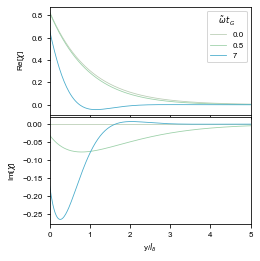

In [77]:
sigs1 = [0, 5.4, 22, 86]
sigs10 = [0, 1.76, 7.03, 35.15]
sigs100 = [0, 0.451, 7.22]
sigs = sigs100
L = 0.65
Q = -1
ld = 1
tg = 10/(2 * np.pi)
gammap = .2
# w_til = w[10]
y = np.linspace(0, 10, num=500)
# chi_sim = chi(y, Q, ld, tg, gammap, L, w_til)

zeros = []
fig, ax2 = plt.subplots(nrows=2, figsize=(3.604,4))
fig.subplots_adjust(hspace=0.02)
for i, sig in enumerate(sigs):
    if sig:
        dum = chi(y, Q, ld, tg, gammap, sig / tg)
        chi_cross = dum[np.sign(dum) == -1][0]
        y_cross = y[np.sign(dum) == -1][0]
        zeros.append(y_cross)
    if int(sig):
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gammap, sig / tg), marker=None,
                 color=colors[i*2], lw=.8, label=f'{sigs[i]:.0f}')
    else:
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gammap, sig / tg), marker=None,
                 color=colors[i*2], lw=.8,  label=f'{sigs[i]:.1f}')
        
ax2[0].grid(False)
ax2[1].grid(False)
ax2[0].set_xlim(0, 5)
ax2[1].set_xlim(0, 5)
ax2[0].legend(loc='upper right', prop=font, title=r'$\tilde{\omega} \,t_{G}$') #sigma$')

ax2[0].tick_params(axis='both', which='major', labelsize=8)
ax2[1].tick_params(axis='both', which='major', labelsize=8)
ax2[0].set_ylabel('Re[$\chi$]', **font)
ax2[1].set_ylabel('Im[$\chi$]', **font)
ax2[1].set_xlabel('y/$l_{\delta}$', **font)
ax2[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f'))
# plt.show()p
plt.savefig('Plots\\Profiles\\Predicted_Chi_100%O2.svg', bbox_inches='tight', dpi=400)
zeros

In [129]:
def plot_chi_time(f, params):
    L = params['L']
    Q = params['Q']
    ld = params['ld']
    tg = params['tg']
    gamma = params['R_ohm'] * params['ld'] / params['L']
    
    font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}

    mpl.rc('font', **font)

    w_til = 2 * np.pi * f
    ts = np.array([0, 1/(4*f), 1/(2*f), 3/(4*f)])

    fig, (ax1, ax2) = plt.subplots(figsize=(15, 7.5), ncols=2)
    colors = [(0,0,0), (1,0,0), (0,0,1), (0,1,1)]

    t = np.linspace(0, 1/f, num=201)
    wfm = np.cos(w_til * t)
    ax1.plot(t, wfm, color=(.5,.5,.5))
    ax1.set_xlim(0, np.max(t))

    y = np.linspace(0, 10/np.sqrt(1+f), num=500)
    chi_bar = chi(y, Q, ld, tg, 0, L, w_til)

    for i, t in enumerate(ts):
#         print(t)
        ax1.plot(t, np.cos(w_til * t), color=colors[i], marker='.', ms=8)
        chi_full = 0.5 * chi_bar * np.exp(1j * w_til * t) + 0.5 * np.conj(chi_bar) * np.exp(-1j * w_til * t)
        ax2.plot(y, chi_full.real, color=colors[i], label=f'{i/4:.2f} * 1/f')
    

    ax2.set_xlim(0, np.max(y))
    ax2.set_ylim(-1e-0, 1e-0)
    
    ax1.set_ylabel('V')
    ax1.set_xlabel('t (s)')
    ax2.set_ylabel(r'$\chi$')
    ax2.set_xlabel('y')
    ax2.legend(fontsize=12, title='t')
    
    fig.suptitle('$\tilde{\omega}t_G$' + f' = {f:.2e} Hz')
#     fig.tight_layout()
    plt.show()
    
    return

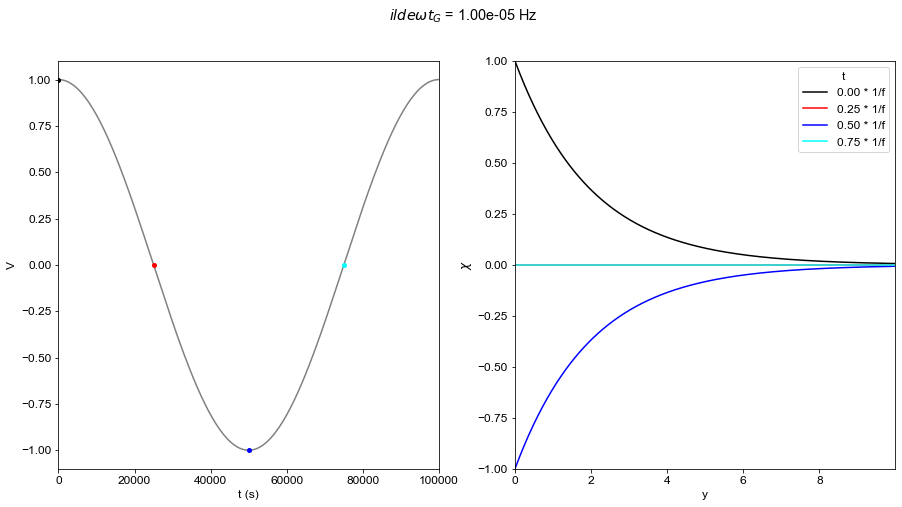

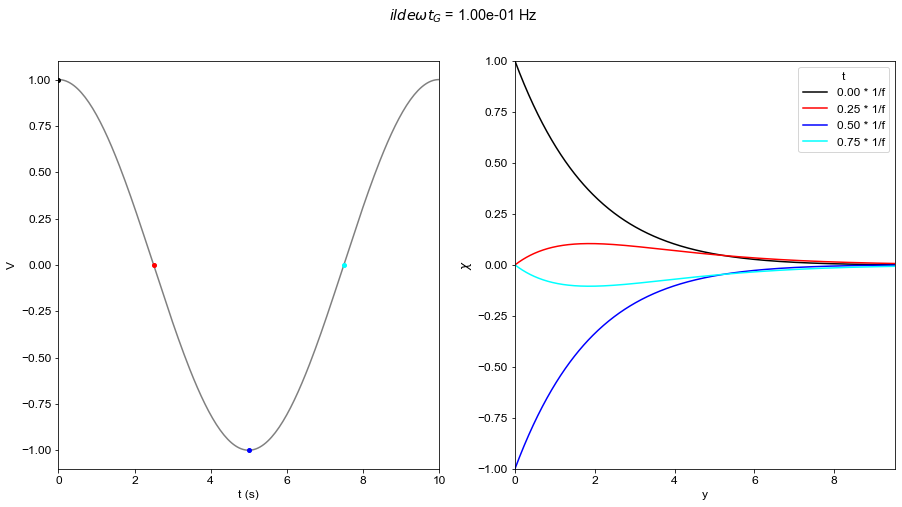

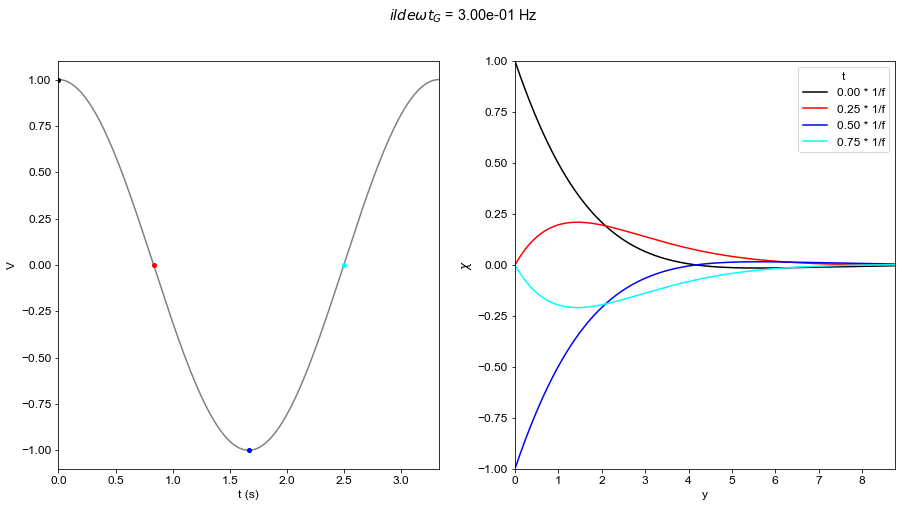

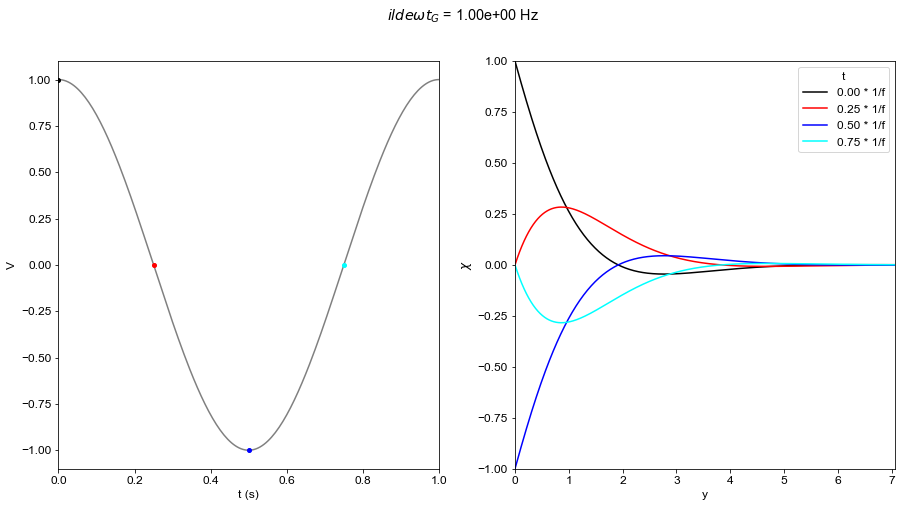

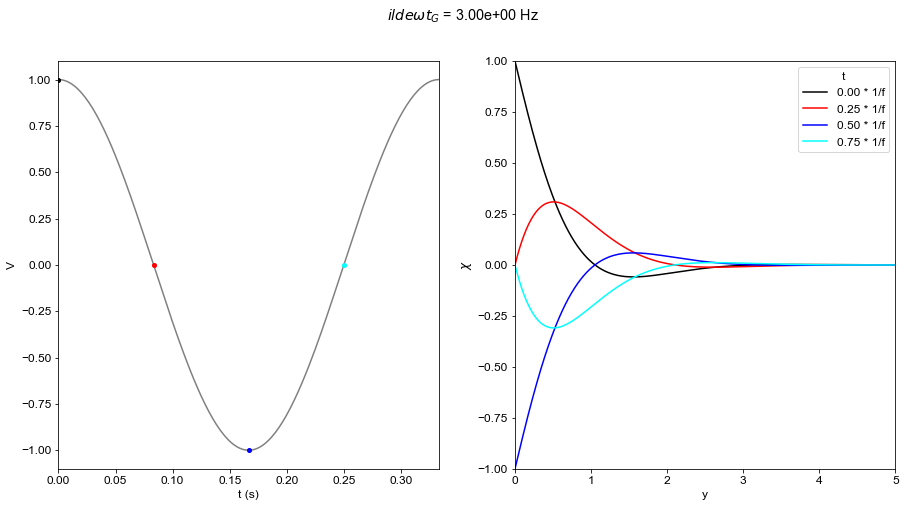

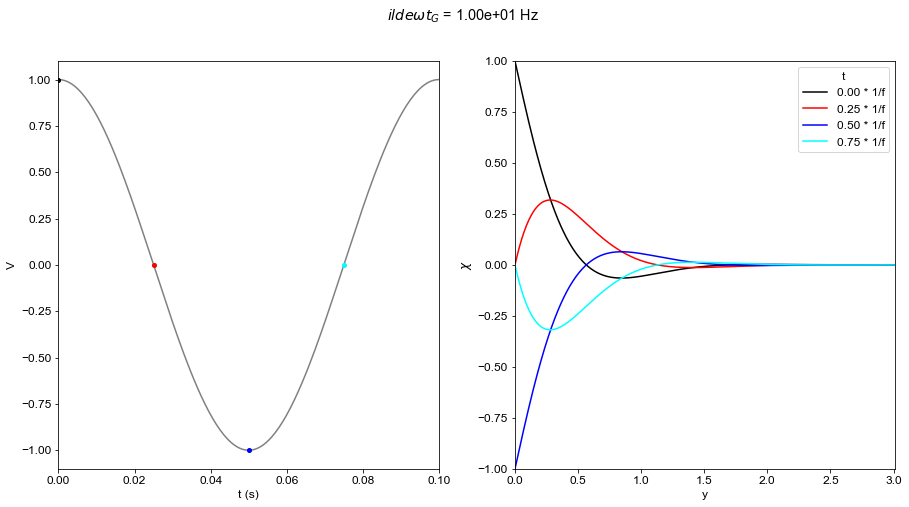

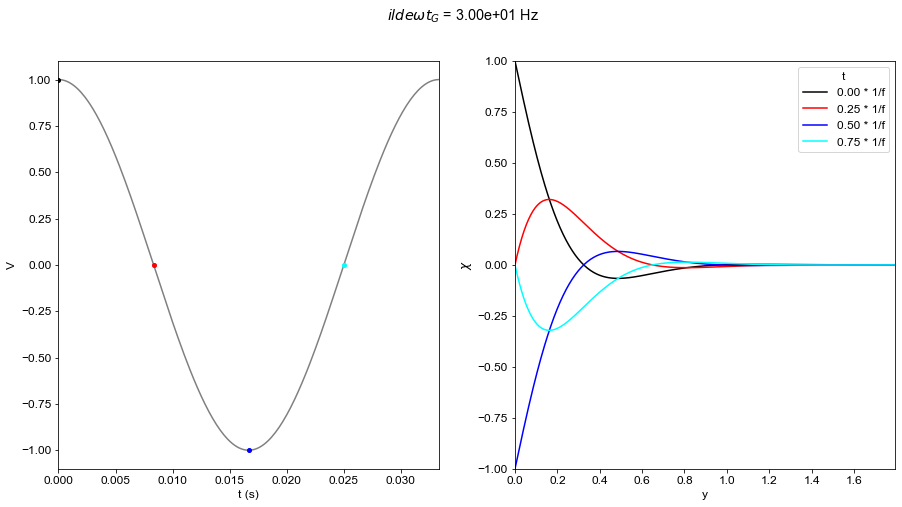

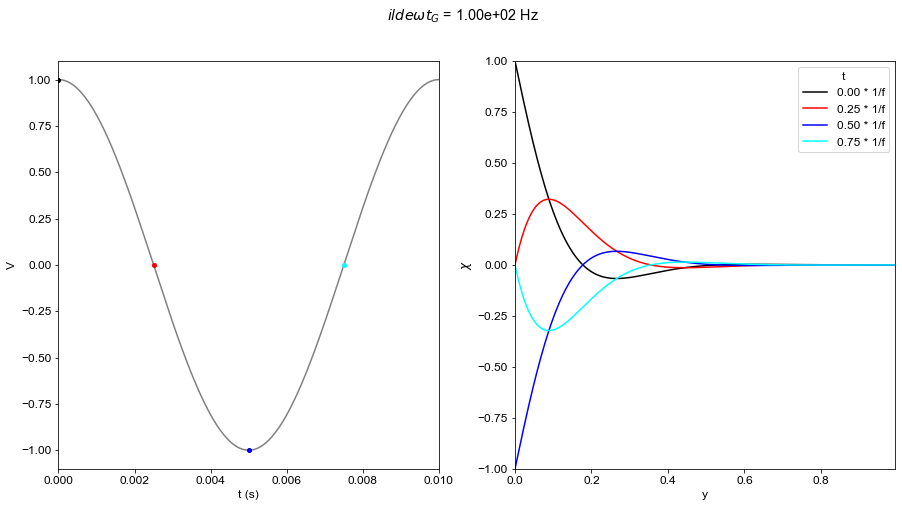

In [130]:
params = {'L': 0.65, 'Q': -1, 'ld': 2, 'R_ohm': 0.1, 'tg': 1}

fs = [1e-5, .1, .3, 1, 3, 10, 30, 100]

for f in fs:
    plot_chi_time(f, params)

(-0.015906818908776724, 0.3340431970843112)


(0.0, 1.05)

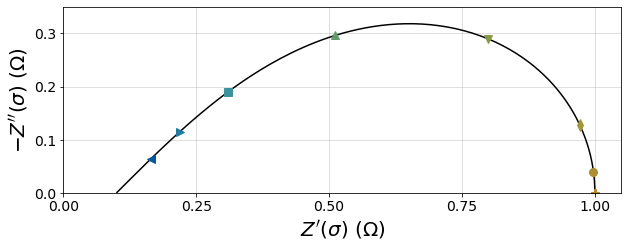

In [7]:
R_ohm = .1
R_chem = .9
tg = 1/(2 * np.pi)
w = 2 * np.pi * np.logspace(-2, 6, num=321)
w[0] = 0
sigs = [0, 0.1, 0.3, 1, 3., 10, 30, 100]
inds = []
Z = R_ohm + R_chem / (np.sqrt(1 + 1j * w * tg))

_, ax = plt.subplots(figsize=(10,10))

plot_nyquist(ax, Z,fmt='-', c=(0,0,0))
xs = [-0.03, -0.04, -0.04, -.02, .012, .012, .012, .012]
ys =  [-0.005, -0.005, -0.005, -.02, -.022, -.022, -.022, -.022]

for i, sig in enumerate(sigs):
    ind = np.isclose(w*tg, sig,atol=1e-2,rtol=1e-2).nonzero()[0][0]
    inds.append(ind)
    plot_nyquist(ax, Z[ind], color=colors[i], marker=markers[i], markersize=8, units=r'$\Omega$')
#     if int(sig):
#         ax.annotate(f'{sig:.0f}', xy=(Z[ind].real,-Z[ind].imag),
#                     xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]),
#                     annotation_clip=False)#, xytext=(Z[ind].real,Z[ind].imag), textcoords='offset points')
#     elif sig==0:
#         ax.annotate(f'{sig:.0f}', xy=(Z[ind].real,-Z[ind].imag),
#                     xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]),
#                     annotation_clip=False)
#     else:
#         ax.annotate(f'{sig:.1f}', xy=(Z[ind].real,-Z[ind].imag), 
#                     xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]))#, xytext=(Z[ind].real,Z[ind].imag), textcoords='offset points')
print(ax.get_ylim())
ax.set_ylim(0, 0.3340+0.0159)
ax.set_xlim(0,1.05)
# plt.savefig('Plots\\Patterned_Z.png', bbox_inches='tight', dpi=400)